In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

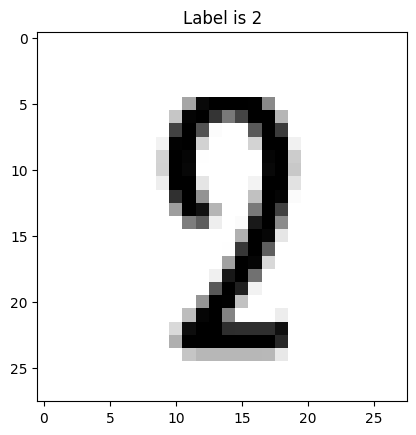

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('TMNIST_Data.csv')

#drop 'names'
df = df.drop('names', axis=1)

# Iterate over the DataFrame rows
for index, row in df.iterrows():
    # The first column is the label
    label = row[0]

    # The rest of columns are pixels
    pixels = row[1:].values

    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = np.array(pixels, dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))

    # Plot
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray_r')  # Use 'gray_r' to invert the colors
    plt.show()

    if index == 0: break  # This stops the loop, I just want to see one


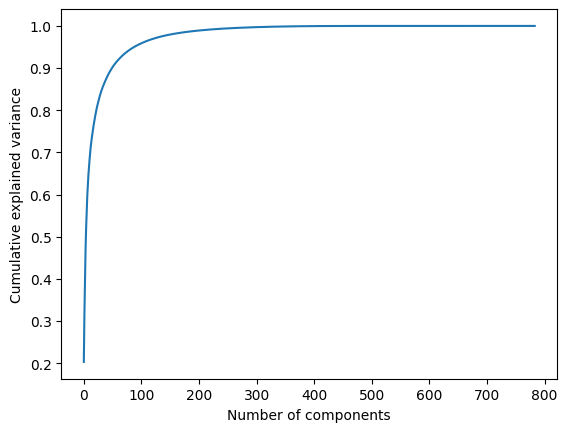

In [3]:
from sklearn.decomposition import PCA

# Separate the labels and the data
X = df.drop('labels', axis=1).values
y = df['labels'].values

# Perform PCA
pca = PCA()
pca.fit(X)

# Calculate the cumulative sum of explained variance ratios
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
num_components_95 = np.argmax(cumulative_variance >= 0.80) + 1

#print(f'Cantidad de autovectores de representación al 95 %: {num_components_95}')

# Plot the cumulative explained variance ratio
plt.plot(cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


In [4]:
# Get the indices of the components that explain at least 95% of the variance
components_95 = pca.components_[:num_components_95]

# Get the unique columns that contribute to these components
unique_columns_95 = np.unique(np.where(components_95 != 0)[1])

# Imprimir la cantidad de columnas responsables de generar las componentes al 95%
# ERRONEO: print(f'Columnas responsables de generar las componentes al 95%: {unique_columns_95}')
print(f'Cantidad de columnas: {len(unique_columns_95)}')

components_95

Cantidad de columnas: 702


array([[-1.71769365e-19, -2.49800181e-16,  6.66133815e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.28682268e-19,  6.93889390e-17,  1.94289029e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.93035522e-19,  1.38777878e-17, -2.77555756e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.66450231e-18, -5.55111512e-17,  6.66133815e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.45897661e-18, -0.00000000e+00,  3.60822483e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.05398099e-17,  3.33066907e-16,  1.44328993e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

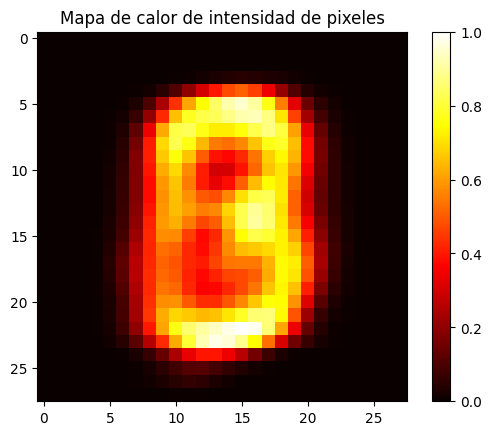

In [5]:
# Sum all the rows for each pixel
pixel_sums = df.drop('labels', axis=1).sum(axis=0).values

# Normalize the pixel sums
pixel_sums_normalized = pixel_sums / pixel_sums.max()

# Reshape the normalized pixel sums into a 28x28 array
heatmap_data = pixel_sums_normalized.reshape((28, 28))

# Plot the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Mapa de calor de intensidad de pixeles')
plt.show()

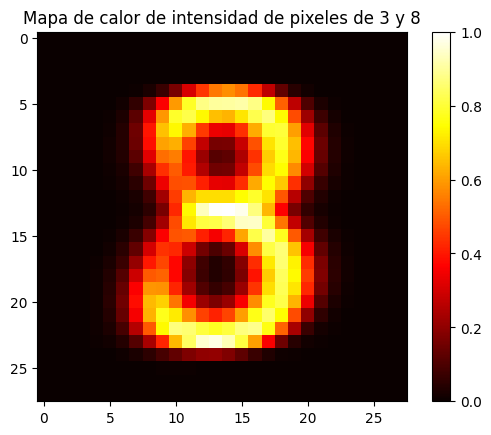

In [6]:
# only 3 or 8
df_3_8 = df[(df['labels'] == 3) | (df['labels'] == 8)]

# Sum all the rows for each pixel
pixel_sums = df_3_8.drop('labels', axis=1).sum(axis=0).values

# Normalize the pixel sums
pixel_sums_normalized = pixel_sums / pixel_sums.max()

# Reshape the normalized pixel sums into a 28x28 array
heatmap_data = pixel_sums_normalized.reshape((28, 28))

# Plot the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Mapa de calor de intensidad de pixeles de 3 y 8')
plt.show()

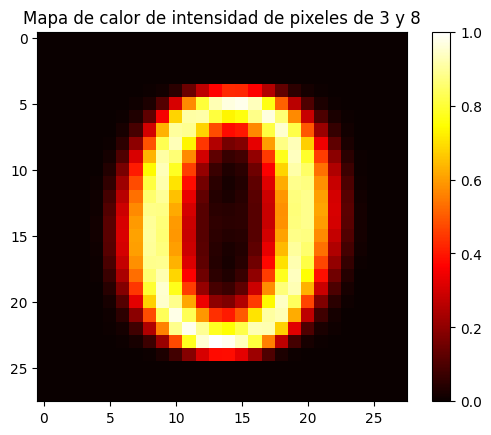

In [7]:
# only 3 or 8
df_3_8 = df[df['labels'] == 0]

df_completo = df.copy()

# Sum all the rows for each pixel
pixel_sums = df_3_8.drop('labels', axis=1).sum(axis=0).values

# Normalize the pixel sums
pixel_sums_normalized = pixel_sums / pixel_sums.max()

# Reshape the normalized pixel sums into a 28x28 array
heatmap_data = pixel_sums_normalized.reshape((28, 28))

# Plot the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Mapa de calor de intensidad de pixeles de 3 y 8')
plt.show()

In [8]:
#amount of pixels that summed up to 0
zero_sum_pixels = np.sum(pixel_sums == 0)
print(f'Cantidad de píxeles que sumaron 0: {zero_sum_pixels}')

df_copy = df.copy()

Cantidad de píxeles que sumaron 0: 253


In [9]:
df = df_copy.copy()

df_labels = df['labels']

# columnas que no sumaron 0
non_zero_sum_pixels = np.sum(pixel_sums != 0)
print(f'Cantidad de píxeles que no sumaron 0: {non_zero_sum_pixels}')
#imprimir esas columnas
cols_non_zero_sum = np.where(pixel_sums != 0)[0]
#print(f'Columnas que no sumaron 0: {np.where(pixel_sums != 0)[0]}')

#columnas que sumaron 0
cols_zero_sum = np.where(pixel_sums == 0)[0]
print(f'Columnas que sumaron 0: {cols_zero_sum.shape}')


# sacar columnas que sumaron 0
df = df.drop(df.columns[cols_zero_sum], axis=1)

print(f'Cantidad de columnas restantes: {df.shape[1]}')

df['labels'] = df_labels
# poner labels al principio
df = df[['labels'] + [col for col in df.columns if col != 'labels']]

df.head()



Cantidad de píxeles que no sumaron 0: 531
Columnas que sumaron 0: (253,)
Cantidad de columnas restantes: 532


,labels,94,95,96,97,98,99,100,101,102,...,740,741,742,743,765,766,767,768,769,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#cantidad de pixeles que promediaron 1
one_avg_pixels = np.sum(pixel_sums_normalized == 255)
print(f'Cantidad de píxeles que promediaron 255: {one_avg_pixels}')

Cantidad de píxeles que promediaron 255: 0


**Acá abajo habría que agregar también algún criterio tipo 'tomar pixeles del medio' vs random, o así para evaluar si es mejor o no**

In [11]:
df.shape

(29900, 533)

In [12]:
# Calculate the average pixel values for each label
promedios_labels = df.groupby('labels').mean()

# Create an empty DataFrame to store the pixel differences
pixel_diffs = []

recorridas = []

# Iterate over all the pairs of labels
for label1 in promedios_labels.index:
    for label2 in promedios_labels.index:
        if label1 != label2 and (label2, label1) not in recorridas and (label1, label2) not in recorridas:
            # Calculate the absolute differences between the average pixel values
            pixel_diff = (np.abs(promedios_labels.loc[label1] - promedios_labels.loc[label2])).mean()

            # Append the pixel differences to the DataFrame
            pixel_diffs.append((label1, label2, pixel_diff))

            recorridas.append((label1, label2))


pixel_diffs


[(0, 1, 57.38114957125255),
 (0, 2, 42.60597794653859),
 (0, 3, 43.78483541629995),
 (0, 4, 47.42491890260769),
 (0, 5, 34.34459916513691),
 (0, 6, 29.90119634370207),
 (0, 7, 55.362152664269374),
 (0, 8, 24.772360877109158),
 (0, 9, 31.21127442351699),
 (1, 2, 39.34550380969146),
 (1, 3, 34.5961217843941),
 (1, 4, 37.29046005481932),
 (1, 5, 40.01625594085548),
 (1, 6, 46.44362913973898),
 (1, 7, 29.75729876530792),
 (1, 8, 51.33606004979003),
 (1, 9, 45.01443722181708),
 (2, 3, 28.579447154675986),
 (2, 4, 46.51758178892047),
 (2, 5, 38.99200341992104),
 (2, 6, 44.702879271757986),
 (2, 7, 37.89839062539291),
 (2, 8, 33.17668544270374),
 (2, 9, 41.49216624336761),
 (3, 4, 37.767245454774056),
 (3, 5, 24.70346958533457),
 (3, 6, 41.89202416576559),
 (3, 7, 40.63438215102974),
 (3, 8, 31.138753866271028),
 (3, 9, 33.582931827897504),
 (4, 5, 39.72459765634823),
 (4, 6, 36.44726469182991),
 (4, 7, 43.51547828601605),
 (4, 8, 41.45206766917293),
 (4, 9, 39.21628988860111),
 (5, 6, 27.565

In [13]:
# top 5 pares de labels con mayor diferencia promedio
top_5_differences = sorted(pixel_diffs, key=lambda x: x[2], reverse=True)[:5]

# top 5 pares de labels con menor diferencia promedio
bottom_5_differences = sorted(pixel_diffs, key=lambda x: x[2])[:5]

print('Top 5 pares de labels con mayor diferencia promedio:')
for label1, label2, diff in top_5_differences:
    print(f'Labels {label1} y {label2}: {diff}')

print('\nTop 5 pares de labels con menor diferencia promedio:')
for label1, label2, diff in bottom_5_differences:
    print(f'Labels {label1} y {label2}: {diff}')

Top 5 pares de labels con mayor diferencia promedio:
Labels 0 y 1: 57.38114957125255
Labels 0 y 7: 55.362152664269374
Labels 6 y 7: 54.521724042547845
Labels 1 y 8: 51.33606004979003
Labels 7 y 8: 50.16946966077401

Top 5 pares de labels con menor diferencia promedio:
Labels 5 y 8: 23.570296979907965
Labels 3 y 5: 24.70346958533457
Labels 0 y 8: 24.772360877109158
Labels 6 y 8: 26.172864435335832
Labels 5 y 6: 27.565182186234814


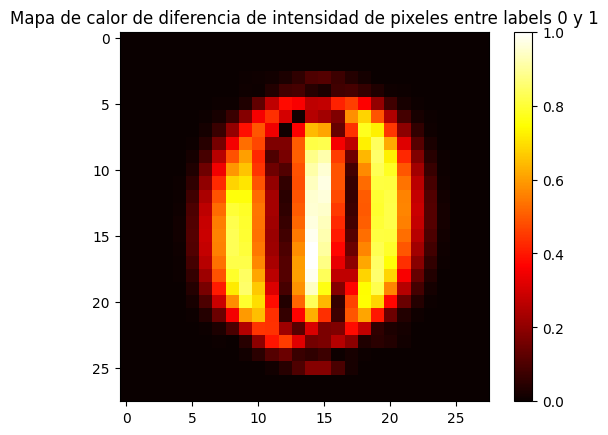

In [14]:
# Calculate the average pixel values for each label
promedios_labels = df_completo.groupby('labels').mean()

# calcular la diferencia absoluta entre el promedio de los pixeles de los labels 0 y 1
pixel_diff = np.abs(promedios_labels.loc[0] - promedios_labels.loc[1])

# normalizar
pixel_diff_normalized = pixel_diff / pixel_diff.max()

# Reshape the normalized pixel differences into a 28x28 array
heatmap_data = pixel_diff_normalized.values.reshape((28, 28))

# Plot the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Mapa de calor de diferencia de intensidad de pixeles entre labels 0 y 1')
plt.show()


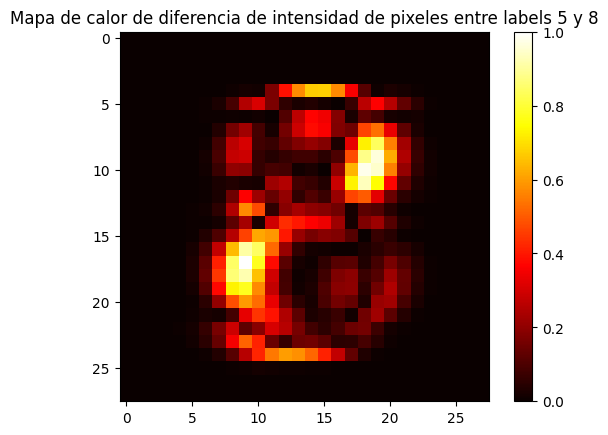

In [15]:
# Calculate the average pixel values for each label
promedios_labels = df_completo.groupby('labels').mean()

# calcular la diferencia absoluta entre el promedio de los pixeles de los labels 0 y 1
pixel_diff = np.abs(promedios_labels.loc[5] - promedios_labels.loc[8])

# normalizar
pixel_diff_normalized = pixel_diff / pixel_diff.max()

# Reshape the normalized pixel differences into a 28x28 array
heatmap_data = pixel_diff_normalized.values.reshape((28, 28))

# Plot the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Mapa de calor de diferencia de intensidad de pixeles entre labels 5 y 8')
plt.show()

In [16]:
pixel_diff

1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
780    0.0
781    0.0
782    0.0
783    0.0
784    0.0
Length: 784, dtype: float64

# Punto 2

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#lista de 0 a 783
all_columns = np.arange(784)
#reshape a cuadrada
all_columns = all_columns.reshape((28, 28))

#abajo a la izquierda
bottom_left = all_columns[20, 10]+1 # le agregamos uno porque arranca en 1
#arriba a la derecha
top_right = all_columns[5, 20]+1
#medio
middle = all_columns[14, 14]+1

atributo_elegido = [str(bottom_left), str(top_right), str(middle)]

#calcular accuracy con 3 atributos

# dataframe con imágenes correspondientes a los dígitos 0 o 1
df_0_1 = df[(df['labels'] == 0) | (df['labels'] == 1)]

# cuántas muestras se tienen y si está balanceado
count_0 = df_0_1[df_0_1['labels'] == 0].shape[0]
count_1 = df_0_1[df_0_1['labels'] == 1].shape[0]
print(f'Cantidad de muestras del dígito 0: {count_0}')
print(f'Cantidad de muestras del dígito 1: {count_1}')

X = df_0_1[atributo_elegido].values
y = df_0_1['labels'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud con 3 los atributos elegidos a ojo: {accuracy}')


Cantidad de muestras del dígito 0: 2990
Cantidad de muestras del dígito 1: 2990
Exactitud con 3 los atributos elegidos a ojo: 0.967391304347826


In [18]:
# dataframe con imágenes correspondientes a los dígitos 0 o 1
df_1 = df[df['labels'] == 1]
df_0 = df[df['labels'] == 0]

# calcuar el promedio para cada pixel
mean_1 = df_1.mean()
mean_0 = df_0.mean()

#calcular la diferencia absoluta
diff = np.abs(mean_1 - mean_0)

#calcular los 3 pixeles con mayor diferencia
diff_sorted = diff.sort_values(ascending=False)
atributo_elegido = diff_sorted.index[:3].values

#calcular accuracy con 3 atributos

# dataframe con imágenes correspondientes a los dígitos 0 o 1
df_0_1 = df[(df['labels'] == 0) | (df['labels'] == 1)]

# cuántas muestras se tienen y si está balanceado
count_0 = df_0_1[df_0_1['labels'] == 0].shape[0]
count_1 = df_0_1[df_0_1['labels'] == 1].shape[0]
print(f'Cantidad de muestras del dígito 0: {count_0}')
print(f'Cantidad de muestras del dígito 1: {count_1}')

X = df_0_1[atributo_elegido].values
y = df_0_1['labels'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud con 3 los atributos según máxima diferencia absoluta entre pixeles: {accuracy}')

Cantidad de muestras del dígito 0: 2990
Cantidad de muestras del dígito 1: 2990
Exactitud con 3 los atributos según máxima diferencia absoluta entre pixeles: 0.9790969899665551


In [19]:


# train y test
X_0_1 = df_0_1.drop('labels', axis=1).values
y_0_1 = df_0_1['labels'].values
X_train, X_test, y_train, y_test = train_test_split(X_0_1, y_0_1, test_size=0.2, random_state=42)

# KNN en los datos de train, con pocos atributos
# distintos conjuntos de 3 atributos creando 50 distintos para 3, 5, 7, 9, 11 atributos

sets_atributos = np.random.choice(range(1, 530), (50, 3), replace=False).tolist()
sets_atributos += np.random.choice(range(1, 531), (50, 5), replace=False).tolist()
sets_atributos += np.random.choice(range(1, 531), (50, 7), replace=False).tolist()
sets_atributos += np.random.choice(range(1, 531), (50, 9), replace=False).tolist()
sets_atributos += np.random.choice(range(1, 531), (50, 11), replace=True).tolist()

print(sets_atributos[:5])

print(X_train.shape)

knn = KNeighborsClassifier(n_neighbors=3)
preds = []

for attributes in sets_atributos:
    knn.fit(X_train[:, attributes], y_train)
    y_pred = knn.predict(X_test[:, attributes])
    accuracy = accuracy_score(y_test, y_pred)
    preds.append((attributes, accuracy))
    print(f'Atributos: {attributes}, Exactitud: {accuracy}')

# Atributos con mejor exactitud
best_attributes = max(preds, key=lambda x: x[1])[0]
print(f'Mejores atributos: {best_attributes}, Exactitud: {max(preds, key=lambda x: x[1])[1]}')

[[117, 321, 479], [59, 291, 309], [122, 525, 313], [27, 471, 369], [425, 415, 386]]
(4784, 532)
Atributos: [117, 321, 479], Exactitud: 0.9615384615384616
Atributos: [59, 291, 309], Exactitud: 0.9790969899665551
Atributos: [122, 525, 313], Exactitud: 0.9138795986622074
Atributos: [27, 471, 369], Exactitud: 0.9255852842809364
Atributos: [425, 415, 386], Exactitud: 0.9448160535117057
Atributos: [230, 2, 417], Exactitud: 0.8260869565217391
Atributos: [326, 84, 180], Exactitud: 0.5175585284280937
Atributos: [281, 142, 382], Exactitud: 0.967391304347826
Atributos: [137, 34, 185], Exactitud: 0.8804347826086957
Atributos: [478, 81, 79], Exactitud: 0.7550167224080268
Atributos: [63, 249, 120], Exactitud: 0.8954849498327759
Atributos: [165, 30, 331], Exactitud: 0.8678929765886287
Atributos: [86, 462, 461], Exactitud: 0.7968227424749164
Atributos: [160, 482, 22], Exactitud: 0.8494983277591973
Atributos: [477, 328, 275], Exactitud: 0.7842809364548495
Atributos: [501, 303, 202], Exactitud: 0.605351

In [20]:
from collections import defaultdict

# Diccionario para almacenar las exactitudes según la cantidad de atributos
accuracy_by_num_attributes = defaultdict(list)

# Calcular la exactitud promedio según la cantidad de atributos
for attributes, accuracy in preds:
    num_attributes = len(attributes)
    accuracy_by_num_attributes[num_attributes].append(accuracy)

# Calcular el promedio de exactitud para cada cantidad de atributos
average_accuracy_by_num_attributes = {num_attributes: np.mean(accuracies) for num_attributes, accuracies in accuracy_by_num_attributes.items()}

# Imprimir los resultados
for num_attributes, avg_accuracy in average_accuracy_by_num_attributes.items():
    print(f'Cantidad de atributos: {num_attributes}, Exactitud promedio: {avg_accuracy}')

Cantidad de atributos: 3, Exactitud promedio: 0.8223076923076921
Cantidad de atributos: 5, Exactitud promedio: 0.9070401337792643
Cantidad de atributos: 7, Exactitud promedio: 0.9183110367892975
Cantidad de atributos: 9, Exactitud promedio: 0.9492307692307691
Cantidad de atributos: 11, Exactitud promedio: 0.9587625418060202


Los 3 que agarramos a mano, son mejores que agarrar 3 random, en promedio.

Número de vecinos (k): Define cuántos vecinos considerar para la predicción.

**No usemos ninguna otra variable para ir probando el modelo dijo aylu**

In [21]:
# d. Comparar modelos de KNN utilizando distintos atributos y distintos valores de k
# nos quedamos solo con los grupos de 11 atributos, que fueron los que tuvieron mejor exactitud
from sklearn.metrics import confusion_matrix

k_values = [1, 3, 5, 10, 20, 50]
best_accuracy = 0
best_k = 0
best_attributes = []

results = []

for k in k_values:
    for attributes in sets_atributos:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train[:, attributes], y_train)
        y_pred = knn.predict(X_test[:, attributes])
        accuracy = accuracy_score(y_test, y_pred)

        results.append((k, attributes, accuracy))
        
        print(f'k: {k}, Atributos: {attributes}, Exactitud: {accuracy}')
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_attributes = attributes
            precision = np.mean(y_pred == y_test)
            #Matriz de confusión
            cm = confusion_matrix(y_test, y_pred)

print(f'Mejor modelo - k: {best_k}, Atributos: {best_attributes}, Exactitud: {best_accuracy}')
print(f'Precisión: {precision}')
print(f'Matriz de confusión:\n{cm}')


k: 1, Atributos: [117, 321, 479], Exactitud: 0.9565217391304348
k: 1, Atributos: [59, 291, 309], Exactitud: 0.9489966555183946
k: 1, Atributos: [122, 525, 313], Exactitud: 0.6831103678929766
k: 1, Atributos: [27, 471, 369], Exactitud: 0.689799331103679
k: 1, Atributos: [425, 415, 386], Exactitud: 0.9322742474916388
k: 1, Atributos: [230, 2, 417], Exactitud: 0.4782608695652174
k: 1, Atributos: [326, 84, 180], Exactitud: 0.5175585284280937
k: 1, Atributos: [281, 142, 382], Exactitud: 0.9623745819397993
k: 1, Atributos: [137, 34, 185], Exactitud: 0.8478260869565217
k: 1, Atributos: [478, 81, 79], Exactitud: 0.7391304347826086
k: 1, Atributos: [63, 249, 120], Exactitud: 0.8913043478260869
k: 1, Atributos: [165, 30, 331], Exactitud: 0.8419732441471572
k: 1, Atributos: [86, 462, 461], Exactitud: 0.7842809364548495
k: 1, Atributos: [160, 482, 22], Exactitud: 0.8520066889632107
k: 1, Atributos: [477, 328, 275], Exactitud: 0.7182274247491639
k: 1, Atributos: [501, 303, 202], Exactitud: 0.593645

In [22]:
# calcular la exactitud promedio para cada k
accuracy_by_k = defaultdict(list)

for k, attributes, accuracy in results:
    accuracy_by_k[k].append((attributes, accuracy))

# Calculate the average accuracy for each k, attributes combination

average_accuracy_by_k_attributes = {}

for k, attributes_accuracies in accuracy_by_k.items():
    for attributes, accuracies in attributes_accuracies:
        average_accuracy_by_k_attributes[f'{k}, {len(attributes)} attributes'] = np.mean(accuracies)

# Print the results
for k_attributes, avg_accuracy in average_accuracy_by_k_attributes.items():
    print(f'{k_attributes}: {avg_accuracy}')    

1, 3 attributes: 0.9389632107023411
1, 5 attributes: 0.903010033444816
1, 7 attributes: 0.5351170568561873
1, 9 attributes: 0.9824414715719063
1, 11 attributes: 0.9740802675585284
3, 3 attributes: 0.9498327759197325
3, 5 attributes: 0.907190635451505
3, 7 attributes: 0.842809364548495
3, 9 attributes: 0.9824414715719063
3, 11 attributes: 0.9765886287625418
5, 3 attributes: 0.9548494983277592
5, 5 attributes: 0.9122073578595318
5, 7 attributes: 0.8394648829431438
5, 9 attributes: 0.9857859531772575
5, 11 attributes: 0.9774247491638796
10, 3 attributes: 0.9565217391304348
10, 5 attributes: 0.9122073578595318
10, 7 attributes: 0.8453177257525084
10, 9 attributes: 0.9891304347826086
10, 11 attributes: 0.9749163879598662
20, 3 attributes: 0.9548494983277592
20, 5 attributes: 0.9122073578595318
20, 7 attributes: 0.8436454849498328
20, 9 attributes: 0.9857859531772575
20, 11 attributes: 0.9707357859531772
50, 3 attributes: 0.9498327759197325
50, 5 attributes: 0.9155518394648829
50, 7 attribut

In [23]:
average_accuracy_by_k_attributes

{'1, 3 attributes': 0.9389632107023411,
 '1, 5 attributes': 0.903010033444816,
 '1, 7 attributes': 0.5351170568561873,
 '1, 9 attributes': 0.9824414715719063,
 '1, 11 attributes': 0.9740802675585284,
 '3, 3 attributes': 0.9498327759197325,
 '3, 5 attributes': 0.907190635451505,
 '3, 7 attributes': 0.842809364548495,
 '3, 9 attributes': 0.9824414715719063,
 '3, 11 attributes': 0.9765886287625418,
 '5, 3 attributes': 0.9548494983277592,
 '5, 5 attributes': 0.9122073578595318,
 '5, 7 attributes': 0.8394648829431438,
 '5, 9 attributes': 0.9857859531772575,
 '5, 11 attributes': 0.9774247491638796,
 '10, 3 attributes': 0.9565217391304348,
 '10, 5 attributes': 0.9122073578595318,
 '10, 7 attributes': 0.8453177257525084,
 '10, 9 attributes': 0.9891304347826086,
 '10, 11 attributes': 0.9749163879598662,
 '20, 3 attributes': 0.9548494983277592,
 '20, 5 attributes': 0.9122073578595318,
 '20, 7 attributes': 0.8436454849498328,
 '20, 9 attributes': 0.9857859531772575,
 '20, 11 attributes': 0.970735

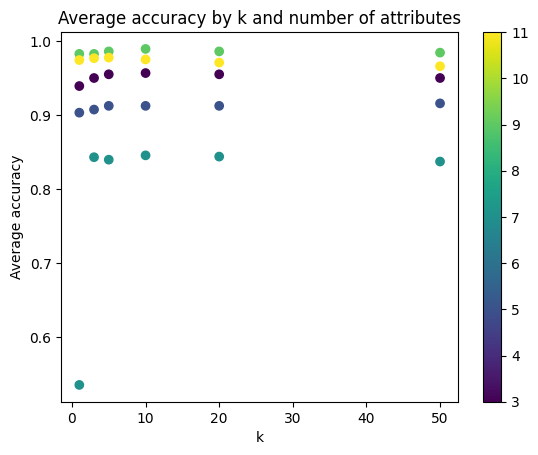

In [24]:
# graficar 
# eje x = k (primer componente de clave), eje y = exactitud promedio (tercera componente) y con color, la cantidad de atributos (segunda componente de clave)

# Extraer los valores de k, cantidad de atributos y exactitud promedio
k_values = [int(key.split(',')[0]) for key in average_accuracy_by_k_attributes.keys()]
num_attributes = [int(key.split(',')[1].split(' ')[1]) for key in average_accuracy_by_k_attributes.keys()]
accuracies = list(average_accuracy_by_k_attributes.values())

# Crear un scatter plot
plt.scatter(k_values, accuracies, c=num_attributes, cmap='viridis')
plt.xlabel('k')
plt.ylabel('Average accuracy')
plt.title('Average accuracy by k and number of attributes')
plt.colorbar()
plt.show()

In [169]:
#results[:5]
""" [(1,
  [394, 505, 135, 165, 25, 228, 125, 159, 478, 320, 371],
  0.9724080267558528),
 (1, [404, 4, 517, 354, 236, 51, 445, 231, 445, 262, 235], 0.9690635451505016),
 (1,
  [181, 262, 498, 171, 485, 304, 285, 354, 175, 280, 470],
  0.955685618729097),
 (1,
  [434, 281, 324, 483, 300, 238, 251, 477, 399, 162, 456],
  0.9423076923076923),
 (1,
  [148, 435, 437, 104, 189, 253, 143, 235, 516, 207, 400],
  0.975752508361204)] 

# graficar la exactitud en eje y, y el número de k en eje x, y colorear según la cantidad de atributos

# Diccionario para almacenar las exactitudes según la cantidad de atributos
accuracy_by_num_attributes = defaultdict(list)

# Calcular la exactitud promedio según la cantidad de atributos
for k, attributes, accuracy in results:
    num_attributes = len(attributes)
    accuracy_by_num_attributes[num_attributes].append((k, accuracy))

# Calcular el promedio de exactitud para cada cantidad de atributos
average_accuracy_by_num_attributes = {num_attributes: np.mean([acc for _, acc in accuracies]) for num_attributes, accuracies in accuracy_by_num_attributes.items()}

#graficar 

plt.figure(figsize=(10, 6))
for num_attributes, accuracies in accuracy_by_num_attributes.items():
    ks, accs = zip(*accuracies)
    plt.plot(ks, accs, 'o-', label=f'{num_attributes} atributos')

plt.xlabel('k')
plt.ylabel('Exactitud')
plt.legend()
plt.title('Exactitud de KNN según cantidad de atributos y valor de k')
plt.show() """

" [(1,\n  [394, 505, 135, 165, 25, 228, 125, 159, 478, 320, 371],\n  0.9724080267558528),\n (1, [404, 4, 517, 354, 236, 51, 445, 231, 445, 262, 235], 0.9690635451505016),\n (1,\n  [181, 262, 498, 171, 485, 304, 285, 354, 175, 280, 470],\n  0.955685618729097),\n (1,\n  [434, 281, 324, 483, 300, 238, 251, 477, 399, 162, 456],\n  0.9423076923076923),\n (1,\n  [148, 435, 437, 104, 189, 253, 143, 235, 516, 207, 400],\n  0.975752508361204)] \n\n# graficar la exactitud en eje y, y el número de k en eje x, y colorear según la cantidad de atributos\n\n# Diccionario para almacenar las exactitudes según la cantidad de atributos\naccuracy_by_num_attributes = defaultdict(list)\n\n# Calcular la exactitud promedio según la cantidad de atributos\nfor k, attributes, accuracy in results:\n    num_attributes = len(attributes)\n    accuracy_by_num_attributes[num_attributes].append((k, accuracy))\n\n# Calcular el promedio de exactitud para cada cantidad de atributos\naverage_accuracy_by_num_attributes = {n

In [28]:
# d. Comparar modelos de KNN utilizando distintos atributos y distintos valores de k
# nos quedamos solo con los grupos de 11 atributos, que fueron los que tuvieron mejor exactitud
from sklearn.metrics import confusion_matrix

sets_atributos = [attributes for attributes in sets_atributos if len(attributes) == 11]

k_values = [1, 3, 5, 10, 20, 50]
best_accuracy = 0
best_k = 0
best_attributes = []

results = []

for k in k_values:
    for attributes in sets_atributos:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train[:, attributes], y_train)
        y_pred = knn.predict(X_test[:, attributes])
        accuracy = accuracy_score(y_test, y_pred)

        results.append((k, attributes, accuracy))
        
        print(f'k: {k}, Atributos: {attributes}, Exactitud: {accuracy}')
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_attributes = attributes
            precision = np.mean(y_pred == y_test)
            #Matriz de confusión
            cm = confusion_matrix(y_test, y_pred)

print(f'Mejor modelo - k: {best_k}, Atributos: {best_attributes}, Exactitud: {best_accuracy}')
print(f'Precisión: {precision}')
print(f'Matriz de confusión:\n{cm}')


k: 1, Atributos: [480, 438, 482, 328, 307, 324, 144, 443, 325, 187, 451], Exactitud: 0.9590301003344481
k: 1, Atributos: [234, 410, 225, 160, 499, 131, 347, 237, 418, 245, 97], Exactitud: 0.9715719063545151
k: 1, Atributos: [61, 521, 499, 112, 294, 393, 316, 162, 254, 494, 113], Exactitud: 0.9824414715719063
k: 1, Atributos: [35, 212, 515, 236, 285, 195, 419, 66, 146, 52, 402], Exactitud: 0.9665551839464883
k: 1, Atributos: [457, 489, 227, 120, 137, 351, 232, 284, 136, 286, 52], Exactitud: 0.975752508361204
k: 1, Atributos: [53, 349, 152, 342, 168, 520, 529, 137, 270, 418, 74], Exactitud: 0.9832775919732442
k: 1, Atributos: [410, 135, 231, 72, 87, 362, 331, 317, 125, 203, 226], Exactitud: 0.9531772575250836
k: 1, Atributos: [422, 446, 135, 315, 442, 189, 289, 438, 480, 432, 55], Exactitud: 0.9899665551839465
k: 1, Atributos: [184, 228, 421, 441, 64, 504, 454, 366, 32, 419, 57], Exactitud: 0.8461538461538461
k: 1, Atributos: [74, 527, 487, 458, 361, 301, 92, 365, 401, 400, 398], Exactit

In [29]:
# calcular la exactitud promedio para cada k
accuracy_by_k = defaultdict(list)

for k, attributes, accuracy in results:
    accuracy_by_k[k].append(accuracy)

average_accuracy_by_k = {k: np.mean(accuracies) for k, accuracies in accuracy_by_k.items()}
average_accuracy_by_k


{1: 0.9544648829431439,
 3: 0.9587625418060202,
 5: 0.9591471571906355,
 10: 0.9575919732441471,
 20: 0.9541638795986621,
 50: 0.9486120401337792}

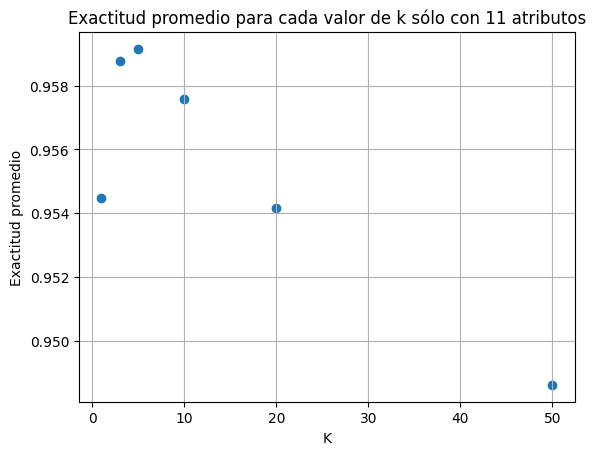

In [30]:
# graficar la exactitud promedio para cada k
plt.grid() 
plt.scatter(list(average_accuracy_by_k.keys()), list(average_accuracy_by_k.values()))
plt.xlabel('K')
plt.ylabel('Exactitud promedio')
plt.title('Exactitud promedio para cada valor de k sólo con 11 atributos')

plt.show()

#### Otras métricas para testear

**Precisión (Precision) SUMA**: Proporción de predicciones positivas correctas sobre el total de predicciones positivas. Indica la exactitud de las predicciones positivas del modelo.

Sensibilidad (Recall): Proporción de verdaderos positivos detectados sobre el total de positivos reales. Mide la capacidad del modelo para encontrar todos los casos positivos.

F1-Score: Media armónica entre la precisión y la sensibilidad. Es útil cuando hay un desequilibrio entre clases y proporciona un equilibrio entre ambas métricas.

**Matriz de confusión: DIJO AYLU QUE PARA EL D) SI O SI :)** Tabla que resume las predicciones correctas e incorrectas clasificadas por cada clase. Ayuda a visualizar el rendimiento del modelo en detalle.

# Punto 3

In [39]:
df.head()

,labels,94,95,96,97,98,99,100,101,102,...,740,741,742,743,765,766,767,768,769,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df.head()

,labels,94,95,96,97,98,99,100,101,102,...,740,741,742,743,765,766,767,768,769,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

X = df.drop('labels', axis=1).values
y = df['labels'].values

# Separar el conjunto de datos en desarrollo (dev) y validación (held-out)
X_dev, X_held_out, y_dev, y_held_out = train_test_split(X, y, test_size=0.2, random_state=42)

# GINI
# Inicializar KFold con 5 particiones
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lista para almacenar la exactitud promedio para cada profundidad
promedio_exactitud_por_profundidad = []

# Probar con profundidades entre 1 y 10
mejor_profundidad = 0
mejor_exactitud = 0

for profundidad in range(1, 11):
    exactitudes = []
    
    # Realizar validación cruzada K-Fold
    for train_index, val_index in kf.split(X_dev):
        X_train_fold, X_val_fold = X_dev[train_index], X_dev[val_index]
        y_train_fold, y_val_fold = y_dev[train_index], y_dev[val_index]
        
        # Entrenar el clasificador de árbol de decisión
        dt = DecisionTreeClassifier(max_depth=profundidad, random_state=42, criterion='gini')
        dt.fit(X_train_fold, y_train_fold)
        
        # Predecir en el conjunto de validación
        y_pred_fold = dt.predict(X_val_fold)
        
        # Calcular la exactitud
        exactitud_fold = accuracy_score(y_val_fold, y_pred_fold)
        exactitudes.append(exactitud_fold)
    
    # Calcular la exactitud promedio para la profundidad actual
    promedio_exactitud = np.mean(exactitudes)
    promedio_exactitud_por_profundidad.append(promedio_exactitud)
    
    # Imprimir la exactitud promedio para la profundidad actual
    print(f'GINI. Profundidad: {profundidad}, Exactitud promedio: {promedio_exactitud}')
    
    # Guardar la mejor profundidad y su exactitud
    if promedio_exactitud > mejor_exactitud:
        mejor_exactitud = promedio_exactitud
        mejor_profundidad = profundidad

print(f'GINI. Mejor profundidad: {mejor_profundidad}, Mejor exactitud promedio: {mejor_exactitud}')

# ENTROPY
# Inicializar KFold con 5 particiones
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lista para almacenar la exactitud promedio para cada profundidad
promedio_exactitud_por_profundidad = []
#también guardamos la predicción para train
promedio_exactitud_por_profundidad_train = []

# Probar con profundidades entre 1 y 10
mejor_profundidad = 0
mejor_exactitud = 0

for profundidad in range(1, 11):
    exactitudes = []
    exactitudes_train = []
    
    # Realizar validación cruzada K-Fold
    for train_index, val_index in kf.split(X_dev):
        X_train_fold, X_val_fold = X_dev[train_index], X_dev[val_index]
        y_train_fold, y_val_fold = y_dev[train_index], y_dev[val_index]
        
        # Entrenar el clasificador de árbol de decisión
        dt = DecisionTreeClassifier(max_depth=profundidad, random_state=42, criterion='entropy')
        dt.fit(X_train_fold, y_train_fold)
        
        # Predecir en el conjunto de validación
        y_pred_fold = dt.predict(X_val_fold)
        #predecir el conjunto de entrenamiento
        y_pred_train = dt.predict(X_train_fold)
        
        # Calcular la exactitud
        exactitud_fold = accuracy_score(y_val_fold, y_pred_fold)
        exactitudes.append(exactitud_fold)
        #exactitud en el conjunto de entrenamiento
        exactitud_train = accuracy_score(y_train_fold, y_pred_train)
        exactitudes_train.append(exactitud_train)

    
    # Calcular la exactitud promedio para la profundidad actual
    promedio_exactitud = np.mean(exactitudes)
    promedio_exactitud_por_profundidad.append(promedio_exactitud)
    promedio_exactitud_train = np.mean(exactitudes_train)
    promedio_exactitud_por_profundidad_train.append(promedio_exactitud_train)
    
    # Imprimir la exactitud promedio para la profundidad actual
    print(f'ENTROPY. Profundidad: {profundidad}, Exactitud promedio: {promedio_exactitud}')
    
    # Guardar la mejor profundidad y su exactitud
    if promedio_exactitud > mejor_exactitud:
        mejor_exactitud = promedio_exactitud
        mejor_profundidad = profundidad

print(f'ENTROPY. Mejor profundidad: {mejor_profundidad}, Mejor exactitud promedio: {mejor_exactitud}')


GINI. Profundidad: 1, Exactitud promedio: 0.19439799331103677
GINI. Profundidad: 2, Exactitud promedio: 0.36517558528428096
GINI. Profundidad: 3, Exactitud promedio: 0.5895484949832775
GINI. Profundidad: 4, Exactitud promedio: 0.7935200668896321
GINI. Profundidad: 5, Exactitud promedio: 0.8321906354515051
GINI. Profundidad: 6, Exactitud promedio: 0.8685200668896321
GINI. Profundidad: 7, Exactitud promedio: 0.89623745819398
GINI. Profundidad: 8, Exactitud promedio: 0.9129180602006688
GINI. Profundidad: 9, Exactitud promedio: 0.921613712374582
GINI. Profundidad: 10, Exactitud promedio: 0.9262123745819398
GINI. Mejor profundidad: 10, Mejor exactitud promedio: 0.9262123745819398
ENTROPY. Profundidad: 1, Exactitud promedio: 0.19439799331103677
ENTROPY. Profundidad: 2, Exactitud promedio: 0.3655936454849499
ENTROPY. Profundidad: 3, Exactitud promedio: 0.5929347826086957
ENTROPY. Profundidad: 4, Exactitud promedio: 0.8040551839464882
ENTROPY. Profundidad: 5, Exactitud promedio: 0.834239130434

El mejor modelo utiliza ENTROPY

In [45]:
# ENTROPY
# Inicializar KFold con 5 particiones
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Probar con profundidades entre 1 y 10
mejor_profundidad = 0
mejor_exactitud = 0

for profundidad in range(11, 20):
    exactitudes = []
    exactitudes_train = []
    
    # Realizar validación cruzada K-Fold
    for train_index, val_index in kf.split(X_dev):
        X_train_fold, X_val_fold = X_dev[train_index], X_dev[val_index]
        y_train_fold, y_val_fold = y_dev[train_index], y_dev[val_index]
        
        # Entrenar el clasificador de árbol de decisión
        dt = DecisionTreeClassifier(max_depth=profundidad, random_state=42, criterion='entropy')
        dt.fit(X_train_fold, y_train_fold)
        
        # Predecir en el conjunto de validación
        y_pred_fold = dt.predict(X_val_fold)
        #predecir el conjunto de entrenamiento
        y_pred_train = dt.predict(X_train_fold)
        
        # Calcular la exactitud
        exactitud_fold = accuracy_score(y_val_fold, y_pred_fold)
        exactitudes.append(exactitud_fold)
        #exactitud en el conjunto de entrenamiento
        exactitud_train = accuracy_score(y_train_fold, y_pred_train)
        exactitudes_train.append(exactitud_train)

    
    # Calcular la exactitud promedio para la profundidad actual
    promedio_exactitud = np.mean(exactitudes)
    promedio_exactitud_por_profundidad.append(promedio_exactitud)
    promedio_exactitud_train = np.mean(exactitudes_train)
    promedio_exactitud_por_profundidad_train.append(promedio_exactitud_train)
    
    # Imprimir la exactitud promedio para la profundidad actual
    print(f'ENTROPY. Profundidad: {profundidad}, Exactitud promedio: {promedio_exactitud}')
    
    # Guardar la mejor profundidad y su exactitud
    if promedio_exactitud > mejor_exactitud:
        mejor_exactitud = promedio_exactitud
        mejor_profundidad = profundidad


print(f'ENTROPY. Mejor profundidad: {mejor_profundidad}, Mejor exactitud promedio: {mejor_exactitud}')

ENTROPY. Profundidad: 11, Exactitud promedio: 0.930685618729097
ENTROPY. Profundidad: 12, Exactitud promedio: 0.9303511705685619
ENTROPY. Profundidad: 13, Exactitud promedio: 0.9308528428093645
ENTROPY. Profundidad: 14, Exactitud promedio: 0.9312709030100335
ENTROPY. Profundidad: 15, Exactitud promedio: 0.9307692307692307
ENTROPY. Profundidad: 16, Exactitud promedio: 0.9311454849498327
ENTROPY. Profundidad: 17, Exactitud promedio: 0.9311454849498327
ENTROPY. Profundidad: 18, Exactitud promedio: 0.9311454849498327
ENTROPY. Profundidad: 19, Exactitud promedio: 0.9311454849498327
ENTROPY. Mejor profundidad: 14, Mejor exactitud promedio: 0.9312709030100335


In [46]:
len(promedio_exactitud_por_profundidad_train)

23

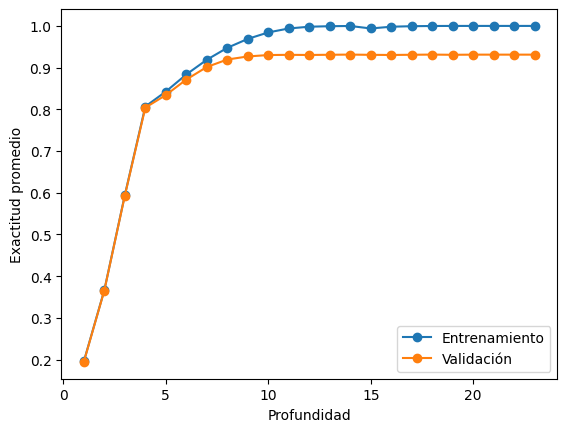

In [47]:
# plotear con un scatter unido con una linea 
# eje x es la profundidad, eje y es la exactitud promedio
# para la exactitud de train (en azul) y la exactitud de validación (en naranja)

plt.plot(range(1, len(promedio_exactitud_por_profundidad_train) + 1), promedio_exactitud_por_profundidad_train, label='Entrenamiento', marker='o')
plt.plot(range(1, len(promedio_exactitud_por_profundidad) + 1), promedio_exactitud_por_profundidad, label='Validación', marker='o')
plt.xlabel('Profundidad')
plt.ylabel('Exactitud promedio')
plt.legend()
plt.show()

In [48]:
# entrenamos el modelo ahora usando todo el conjunto de desarrollo, con el mejor modelo encontrado
# que es con profundidad 10 y criterio entropy

# Entrenar el modelo con el conjunto de desarrollo
dt = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
dt.fit(X_dev, y_dev)

# Predecir en el conjunto de validación
y_pred_held_out = dt.predict(X_held_out)

# exactitud
exactitud_held_out = accuracy_score(y_held_out, y_pred_held_out)
print(f'Exactitud en el conjunto de validación: {exactitud_held_out}')

#Matriz de confusión
cm = confusion_matrix(y_held_out, y_pred_held_out)

# para cada clase, calculamos la precisión y el recall
# precisión = TP / (TP + FP)
# recall = TP / (TP + FN)
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)

# imprimimos la precisión y el recall para cada clase
for i in range(10):
    print(f'Clase {i}: Precisión: {precision[i]}, Recall: {recall[i]}')

print(f'Matriz de confusión:')
cm




Exactitud en el conjunto de validación: 0.9362876254180602
Clase 0: Precisión: 0.9322314049586777, Recall: 0.9543147208121827
Clase 1: Precisión: 0.9466437177280551, Recall: 0.9649122807017544
Clase 2: Precisión: 0.9426644182124789, Recall: 0.9555555555555556
Clase 3: Precisión: 0.909688013136289, Recall: 0.937394247038917
Clase 4: Precisión: 0.9505766062602965, Recall: 0.9584717607973422
Clase 5: Precisión: 0.9354838709677419, Recall: 0.8959349593495934
Clase 6: Precisión: 0.930921052631579, Recall: 0.9324546952224053
Clase 7: Precisión: 0.9602763385146805, Recall: 0.952054794520548
Clase 8: Precisión: 0.9299674267100977, Recall: 0.9034810126582279
Clase 9: Precisión: 0.9260504201680673, Recall: 0.9137645107794361
Matriz de confusión:


array([[564,   1,   1,   2,   2,   3,   8,   0,   5,   5],
       [  1, 550,   4,   3,   2,   0,   0,   8,   1,   1],
       [  1,   3, 559,   4,   2,   2,   3,   2,   2,   7],
       [  2,   5,   6, 554,   3,   5,   1,   2,   8,   5],
       [  1,   2,   3,   3, 577,   4,   3,   2,   0,   7],
       [  7,   3,   9,  17,   3, 551,  10,   3,   8,   4],
       [  9,   2,   2,   1,   3,   7, 566,   1,  15,   1],
       [  4,  10,   0,   3,   3,   2,   0, 556,   0,   6],
       [  8,   3,   4,  14,   4,   6,  14,   0, 571,   8],
       [  8,   2,   5,   8,   8,   9,   3,   5,   4, 551]])

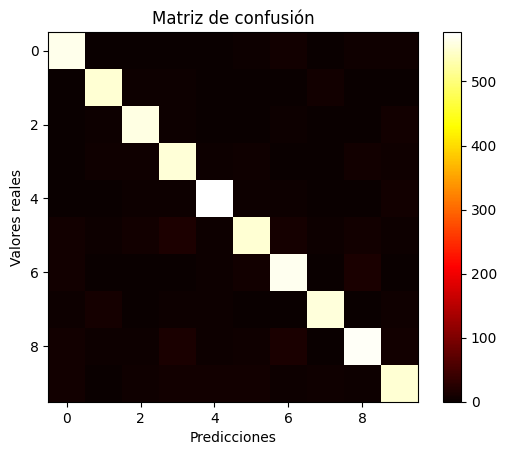

In [49]:
# graficar la matriz de confusión en un heatmap
plt.imshow(cm, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()


In [51]:
# las combinaciones de clases que más fallaron según la matriz de confusión, las entradas que no son de la diagonal
# son los errores
errores = np.where(cm != np.eye(10))
errores

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 8, 9, 0, 1, 2, 3, 4, 7, 8, 9, 0, 1, 2, 3, 4,
        5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
        7, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
        0, 1, 3, 4, 5, 7, 9, 0, 1, 2, 3, 4, 5, 6, 8, 9, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9]))

comparar errores entre especificamente pares de clases

Tipo este grafico hay que usar para ir notando cuando hacemos overfitting (sobre ajuste)

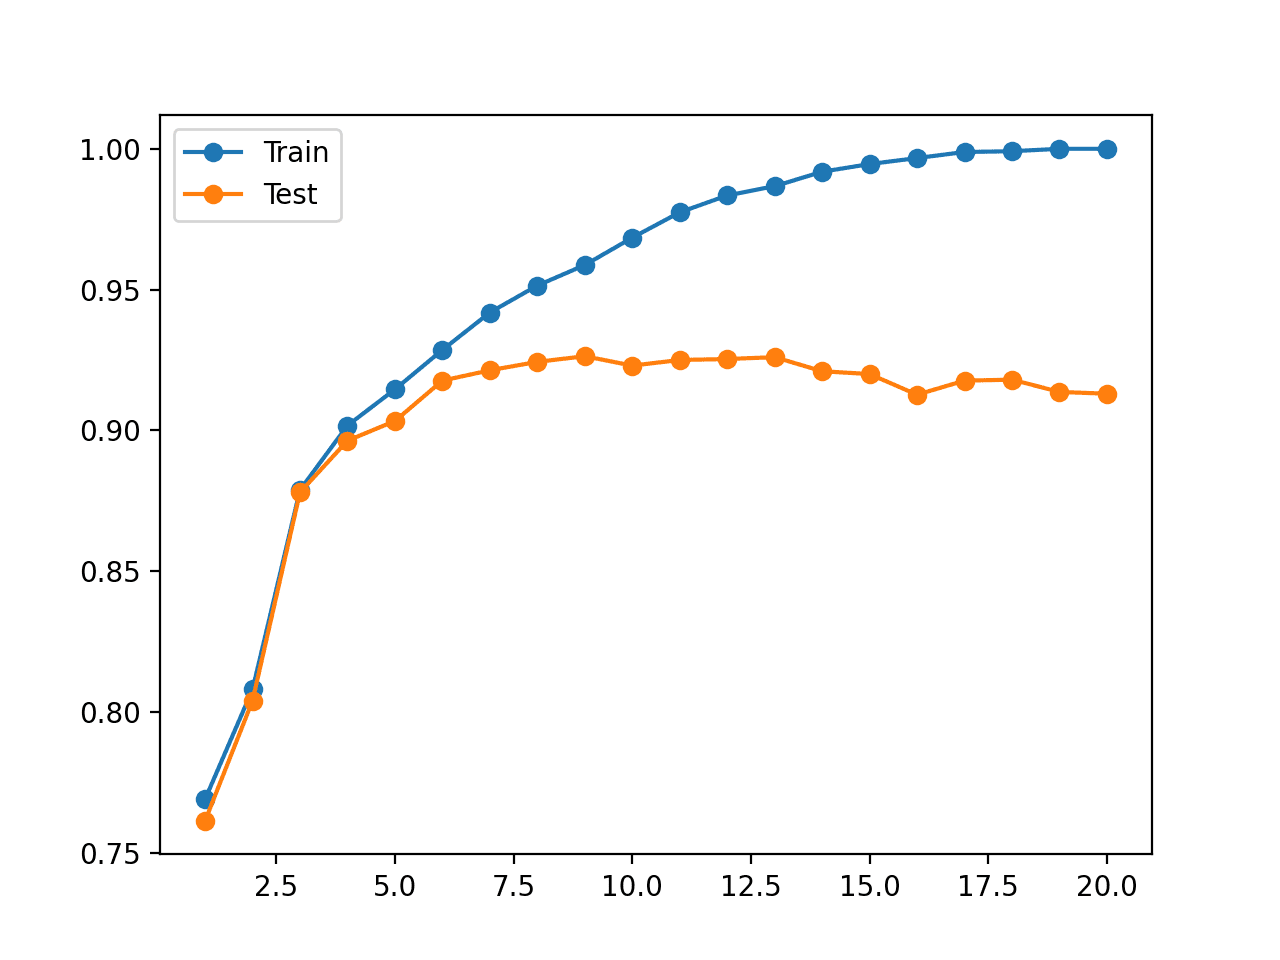